# The Avenger Classifier 💫

### Face Detection using Haar Cascades

<br>

<img src="https://wallpaperaccess.com/full/884080.jpg" width=800>

This project classifies the faces of the 5 following Avengers:
- Chris Evans 
- Chris Hemsworth
- Robert Downey Jr.
- Scarlett Johansson 
- Tom Holland 


---


In [140]:
# Import needed modules
import numpy as np
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

<br>

## Preprocessing

### 1. Detecting face and eyes

First, we try reading a test image using the`imread` function from the `cv2` module.

In [141]:
# output: (width, height, rgb value)

img = cv2.imread('test_images/scarlett.jpeg')
img.shape

(3000, 1750, 3)

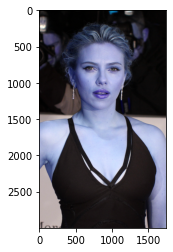

In [142]:
plt.imshow(img)

<br>

**Then, we convert the image to grayscale using the `cvtColor` function.**

In [143]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray.shape

(3000, 1750)

In [144]:
gray

array([[  4,   4,   3, ...,   8,   6,   6],
       [  5,   4,   4, ...,   6,   5,   9],
       [  1,   2,   3, ...,   4,   4,  10],
       ...,
       [147, 152, 151, ..., 162, 163, 159],
       [152, 153, 154, ..., 162, 161, 161],
       [165, 156, 153, ..., 160, 157, 164]], dtype=uint8)

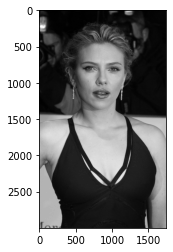

In [145]:
# print out the gray image
plt.imshow(gray, cmap="gray")

**Create a face and eye detector with OpenCV.**

In [146]:
face_cascade = cv2.CascadeClassifier("opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("opencv/haarcascades/haarcascade_eye.xml")

<br>

**Now we try to detect the face on the image - `gray` we just created above.**

`detectMultiScale` - Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.

In [147]:
# returns an array of of detected faces, each with (x, y, width, height) 

faces = face_cascade.detectMultiScale(gray, 1.3, 5)  # (img, scaleFactor, minNeighbors)

faces

array([[467, 500, 792, 792]], dtype=int32)

In [148]:
(x,y,w,h) = faces[0]
x,y,w,h

(467, 500, 792, 792)

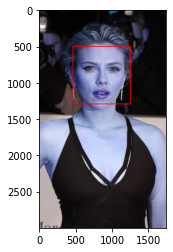

In [149]:
# draws a red rectangle that indicates the face region

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(face_img)

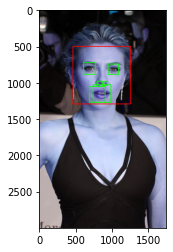

In [150]:
cv2.destroyAllWindows()

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),10)      # draws red rectangle for face
    
    roi_gray = gray[y:y+h, x:x+w]       # cropped detected face in grayscale
    roi_color = face_img[y:y+h, x:x+w]  # cropped detected face in color
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),10) # draw green rectangles for eyes

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

### 2. Cropping the facial region of the image

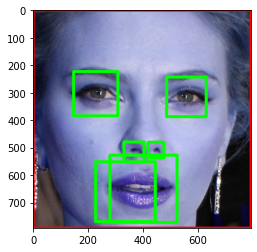

In [151]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

<br>

## Image Processing

### 1. Write and test a function that combines step 1 and 2

We write a function called `get_cropped_image` that takes in an image path and transforms ONE input image to a cropped image with only the face region IF the face is visible and at least 2 eyes are detected.

If the two conditions fail, then nothing is returned.

In [152]:
def get_cropped_image(image_path):
    
    # prevents ipynb_checkpoints files from creating errors for imread
    if (image_path.endswith("jpg") or image_path.endswith("png") or image_path.endswith("jpeg")):      
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]

            eyes = eye_cascade.detectMultiScale(roi_gray)

    # return cropped img in color if at least 2 eyes are detected
            if len(eyes) >= 2:      
                return roi_color

<br>

Test the function on another image in the `test_image` folder named `tom.jpeg`.

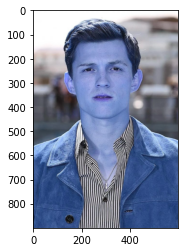

In [153]:
# prints orignal image
tom = cv2.imread("test_images/tom.jpeg")
plt.imshow(tom)

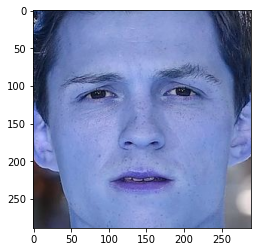

In [154]:
# prints cropped image
tom_cropped = get_cropped_image("test_images/tom.jpeg")
plt.imshow(tom_cropped)

<br>

Now, let us test the function on another image of Tom Holland with his face at an angle. This time, no cropped image should be returned!

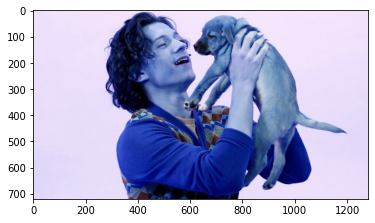

In [155]:
# prints original image
tom_side = cv2.imread("test_images/tom_side.jpeg")
plt.imshow(tom_side)

In [156]:
# prints cropped image
tom_side_cropped = get_cropped_image("test_images/tom_side.jpeg")
tom_side_cropped    # nothing is returned indeed!

<br>

### 2. Crop all Avenger images in the `dataset` folder

Using the `os` module, we create a list called `img_dirs` that contains paths to each individual Avenger's images folder.

In [157]:
path_to_data = "./dataset/"
path_to_cropped_data = "./dataset/cropped/"

In [158]:
import os

img_dirs = []

# go through all sub-directories in the dataset folder 
# and store their path in img_dirs

for entry in os.scandir(path_to_data):
    if entry.is_dir() and (entry.path != './dataset/.ipynb_checkpoints') :
        img_dirs.append(entry.path)
        
img_dirs

['./dataset/chris_evans',
 './dataset/tom_holland',
 './dataset/mark_ruffalo',
 './dataset/scarlett_johansson',
 './dataset/robert_downey_jr',
 './dataset/chris_hemsworth']

<br>

Create a folder called `cropped` inside the `dataset` folder (if one already exists, remove it and create a new one)

In [159]:
import shutil

if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)    # remove existing folder
    
os.mkdir(path_to_cropped_data)             # create new folder

<br>

Create a list called `cropped_image_dirs` that contains the cropped images folder (path) for each Avenger. Then, create a dictionary called `avenger_file_names_dict` that will have [Avenger name, list of image file paths] key value pairs.

In [160]:
cropped_image_dirs = []
avenger_file_names_dict = {}

In [166]:
for img_dir in img_dirs:
    count = 1                                   # initialize count for file name
    avenger_name = img_dir.split('/')[-1]       # taking the last element of the list (name of avenger)
    print("Now processing: ", avenger_name)
    
    avenger_file_names_dict[avenger_name] = []  # set value of the avenger name key to an empty array
    
    # for each image in an avenger folder
    for entry in os.scandir(img_dir):     
       
        roi_color = get_cropped_image(entry.path)

    # if the img's face and eyes are visible
        if roi_color is not None:         
            cropped_folder = path_to_cropped_data + avenger_name

    # create a cropped folder for that avenger if it doesn't exist already
            if not os.path.exists(cropped_folder):  
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)

            cropped_file_name = avenger_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            avenger_file_names_dict[avenger_name].append(cropped_file_path)
            count += 1
            
    print("Done")

Now processing:  chris_evans
Done
Now processing:  tom_holland
Done
Now processing:  mark_ruffalo
Done
Now processing:  scarlett_johansson
Done
Now processing:  robert_downey_jr
Done
Now processing:  chris_hemsworth
Done


<br>

## Feature Engineering Using Wavelet Transformation

Define a function called `w2d` that extracts important facial features into a wavelet transformation image using the `pywt` module. The wavelet transformation images will ultimately help our classifier distinguish between different faces.

In [167]:
# Source: stackoverflow

import numpy as np
import pywt
import cv2

def w2d(img, mode="haar", level=1):
    imArray = img
    
    # convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    # convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    # process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    # reconstructoin
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

<br>

Let's try the function on the `tom_cropped` image we created earlier and turn it into a wavelet transformed image.

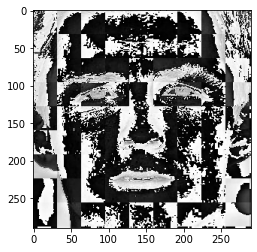

In [168]:
tom_wave = w2d(tom_cropped, 'db1', 5)
plt.imshow(tom_wave, cmap='gray')

<br>

Create a `class_dict` dictionary and assign each Avenger a number (this will be useful very soon)

In [169]:
class_dict = {}
count = 0
for avenger_name in avenger_file_names_dict.keys():
    class_dict[avenger_name] = count
    count += 1

class_dict

{'chris_evans': 0,
 'tom_holland': 1,
 'mark_ruffalo': 2,
 'scarlett_johansson': 3,
 'robert_downey_jr': 4,
 'chris_hemsworth': 5}

<br>

Now we want to iterate through the `avenger_file_names_dict` dictionary and do the following to each image:
1. Scale the **original** (raw) image to 32x32 px
2. **Wavelet transform** the image and scale it to 32x32 px
3. Create a combined image by **stacking** the raw image above the wavelet transformed image and append it into list `X`
4. Append the number of the Avenger into list `y`


In [170]:
# create X and y lists for model training
X = []
y = []

for avenger_name, training_files in avenger_file_names_dict.items():    # iterate through every Avenger
    for training_image in training_files:                               # iterate through every image of that Avenger
        img = cv2.imread(training_image)
        scaled_img_raw = cv2.resize(img, (32,32))                       # scale the raw image
        
        img_wave = w2d(img, 'db1', 5)
        scaled_img_wave = cv2.resize(img_wave, (32,32))                 # scale the wavelet transform image
        
        combined_img = np.vstack((scaled_img_raw.reshape(32*32*3,1), scaled_img_wave.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[avenger_name])

In [171]:
# Prints the length of the image list
len(X)

# Reshapes X
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(250, 4096)

#### Now all data cleaning needed to build the classifier is done!🎊

---

## Model Training

We will use `SVM` (Support Vector Machine) with `rbf kernel` tuned with heuristic finetuning

In [172]:
# import necessary modules

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

### 1. Split data

Split data into training and testing sets using the `train_test_split` function.

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [174]:
# prints the size of the testing set
len(X_test)

63

<br>

### 2. Build a model with random parameters

Fit the training data and assess its performance (accuracy).

>The objective of a `Linear SVC` (Support Vector Classification) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. 

In [198]:
# similar to R's 
# model_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 10)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 5))])

pipe.fit(X_train, y_train)

# similar to R's 
# test_results <- fit %>% predict(X_test) %>% bind_cols(X_test) %>% metrics(truth = ..., estimate = .pred)

pipe.score(X_test, y_test)

0.6825396825396826

<br>

We can also look at detailed statistics of the prediction.

In [176]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.85      0.92      0.88        12
           2       0.91      0.67      0.77        15
           3       0.67      0.62      0.64        13
           4       0.57      0.44      0.50         9
           5       0.50      0.83      0.62         6

    accuracy                           0.68        63
   macro avg       0.67      0.68      0.66        63
weighted avg       0.71      0.68      0.68        63



In [177]:
class_dict

{'chris_evans': 0,
 'tom_holland': 1,
 'mark_ruffalo': 2,
 'scarlett_johansson': 3,
 'robert_downey_jr': 4,
 'chris_hemsworth': 5}

<br>

### 3. Fine-tune the model

We use `GridSearch` to try out different models with different parameters. Our goal is to come up with the best model with best fine-tuned parameters.

In [178]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

<br>

First, we define a dictionary of candidate models that we would like to try and name it `model_params`.

In [179]:
# define different candidate models
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

<br>

We perform cross validation with 5 folds to assess the performance of all the models and display the results in a dataframe using the `DataFrame` function from the `panda` library.

In [180]:
import pandas as pd

scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])                       # standardizes data
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)    # GridSearchCV() similar to tune_grid() in R?
    clf.fit(X_train, y_train)
    
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    best_estimators[algo] = clf.best_estimator_
    
# create a dataframe    
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df
    

,model,best_score,best_params
0,svm,0.732717,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.443670,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.715932,{'logisticregression__C': 1}


In [182]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

<br>

For each model, we assess its performance with the test set and compare it with the score given by the validation set above.

In [183]:
best_estimators["svm"].score(X_test,y_test)

0.7301587301587301

In [184]:
best_estimators["logistic_regression"].score(X_test,y_test)

0.7301587301587301

In [185]:
best_estimators["random_forest"].score(X_test,y_test)

0.47619047619047616

<br>

Based on the scores, we choose the best classifier to be the svm model.

In [187]:
best_clf = best_estimators['svm']

<br>

Create a confusion matrix to visualize the prediction.

In [188]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, best_clf.predict(X_test))
conf_matrix

array([[ 5,  1,  1,  0,  0,  1],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  1, 11,  0,  2,  1],
       [ 0,  1,  0,  8,  2,  2],
       [ 1,  1,  0,  2,  5,  0],
       [ 0,  1,  0,  0,  0,  5]])

<br>

Using the `seaborn` module, we can make the confusion matrix more visually appealing

Text(69.0, 0.5, 'Truth')

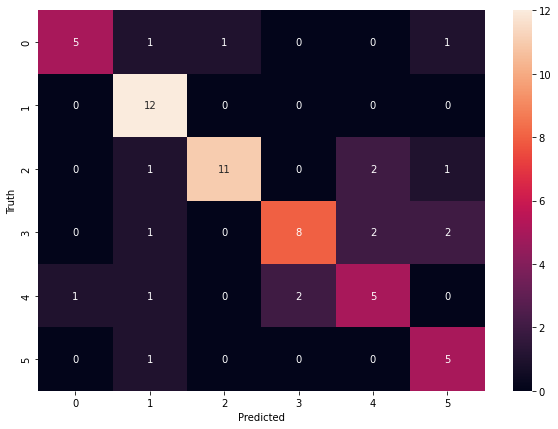

In [199]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [200]:
class_dict

{'chris_evans': 0,
 'tom_holland': 1,
 'mark_ruffalo': 2,
 'scarlett_johansson': 3,
 'robert_downey_jr': 4,
 'chris_hemsworth': 5}

<br>

**Observations:**
- The classifier tend to mix up the faces of Robert Downey Jr. and Scarlett Johansson (and a few times with Tom Holland)
- The prediction accuracy is still low despite re-inspection and reselection of the images in the dataset

<br>

### Save the trained model

In [201]:
%pip install joblib
import joblib

# save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

Note: you may need to restart the kernel to use updated packages.


['saved_model.pkl']

### Save class dictionary

In [202]:
import json

# save the class dictionary as a json file
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))